<a href="https://colab.research.google.com/github/ImKshitij09/AI-and-Machine-learning-lecture/blob/main/Kshitij_housing_pvt_ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

This project attempts to predict housing price in Miami with relevance to surround and amenities it have.

In [124]:
Miami_house_prices = pd.read_csv('miami-housing.csv')
Miami_house_prices.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


number of attributes and tell something about some column or which is important

In [100]:
Miami_house_prices.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


count of observations and how data is scattered

In [101]:
Miami_house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

information about data type, count of null values and not null values .

In [102]:
Miami_house_prices.isnull().sum()

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


Ques1. **Option C. All the other answers are incorrect.**

Ques2. **Option B. No there is no same kind of data type for SALE_PRC & AGE.**

Ques3. Option

In [103]:
Miami_house_prices[Miami_house_prices.duplicated]

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality


Ques4. **Option B: there is no duplicated values**

In [104]:
Miami_house_prices_corelated = Miami_house_prices.corr()

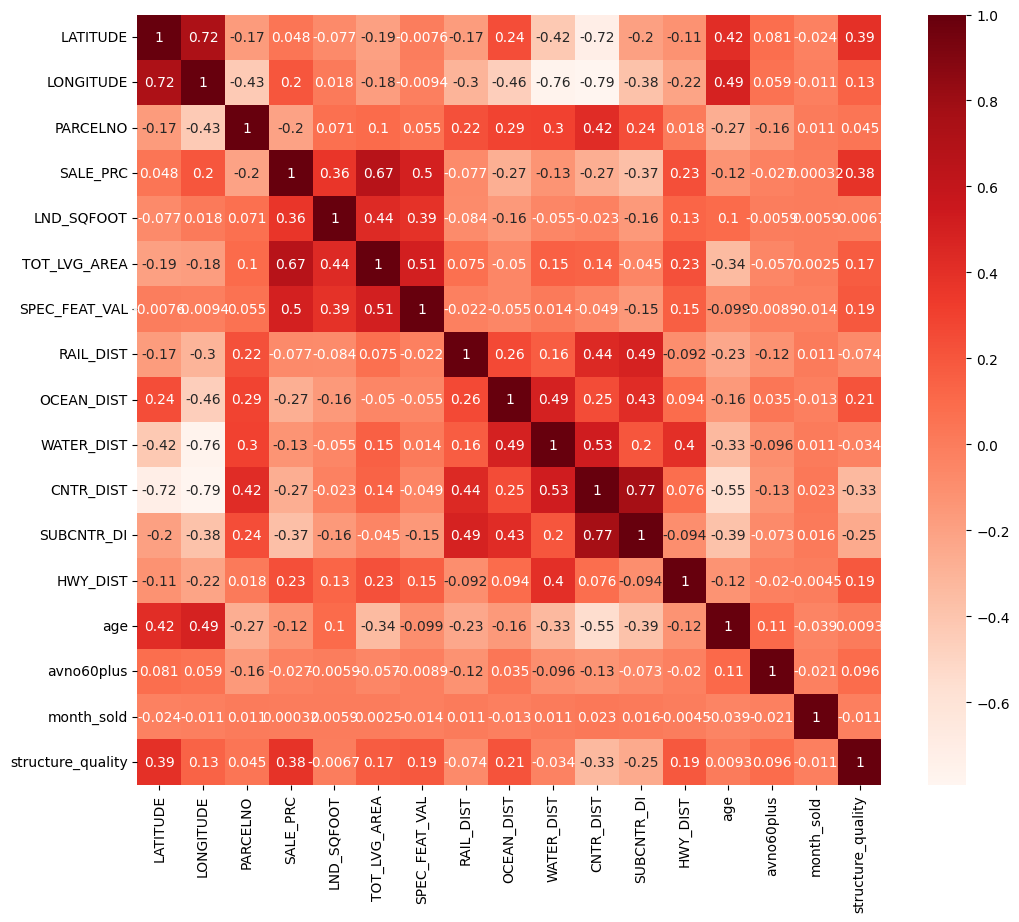

In [105]:
plt.figure(figsize=(12,10))
sns.heatmap(Miami_house_prices_corelated, annot=True, cmap=plt.cm.Reds)
plt.show()


Ques5. **Option D: SALE_PRC has TOT_LIV_AREA as highest correlation with.**

Ques6. **0.38**

Ques7. **Option B: No there is no positive relation between SALE_PRC & OCEAN_DIST**

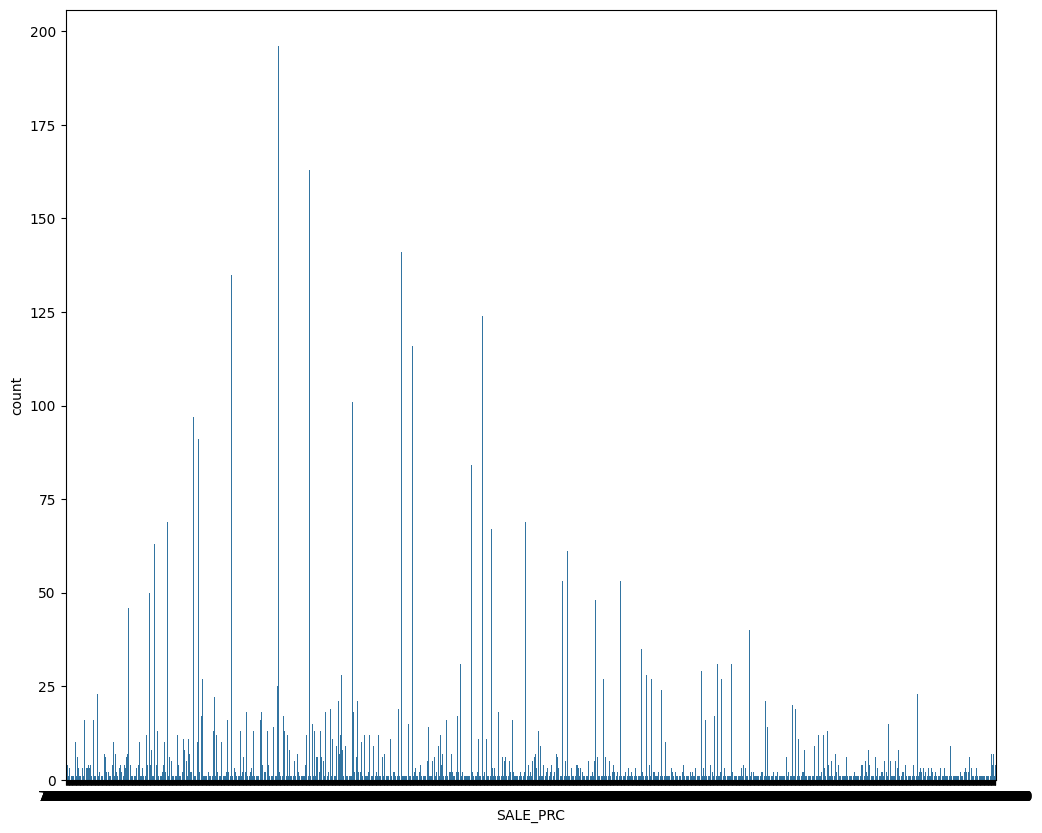

In [106]:
plt.figure(figsize=(12,10))
sns.countplot(x="SALE_PRC", data=Miami_house_prices)
plt.show()

Ques8. **Both C & D are correct**

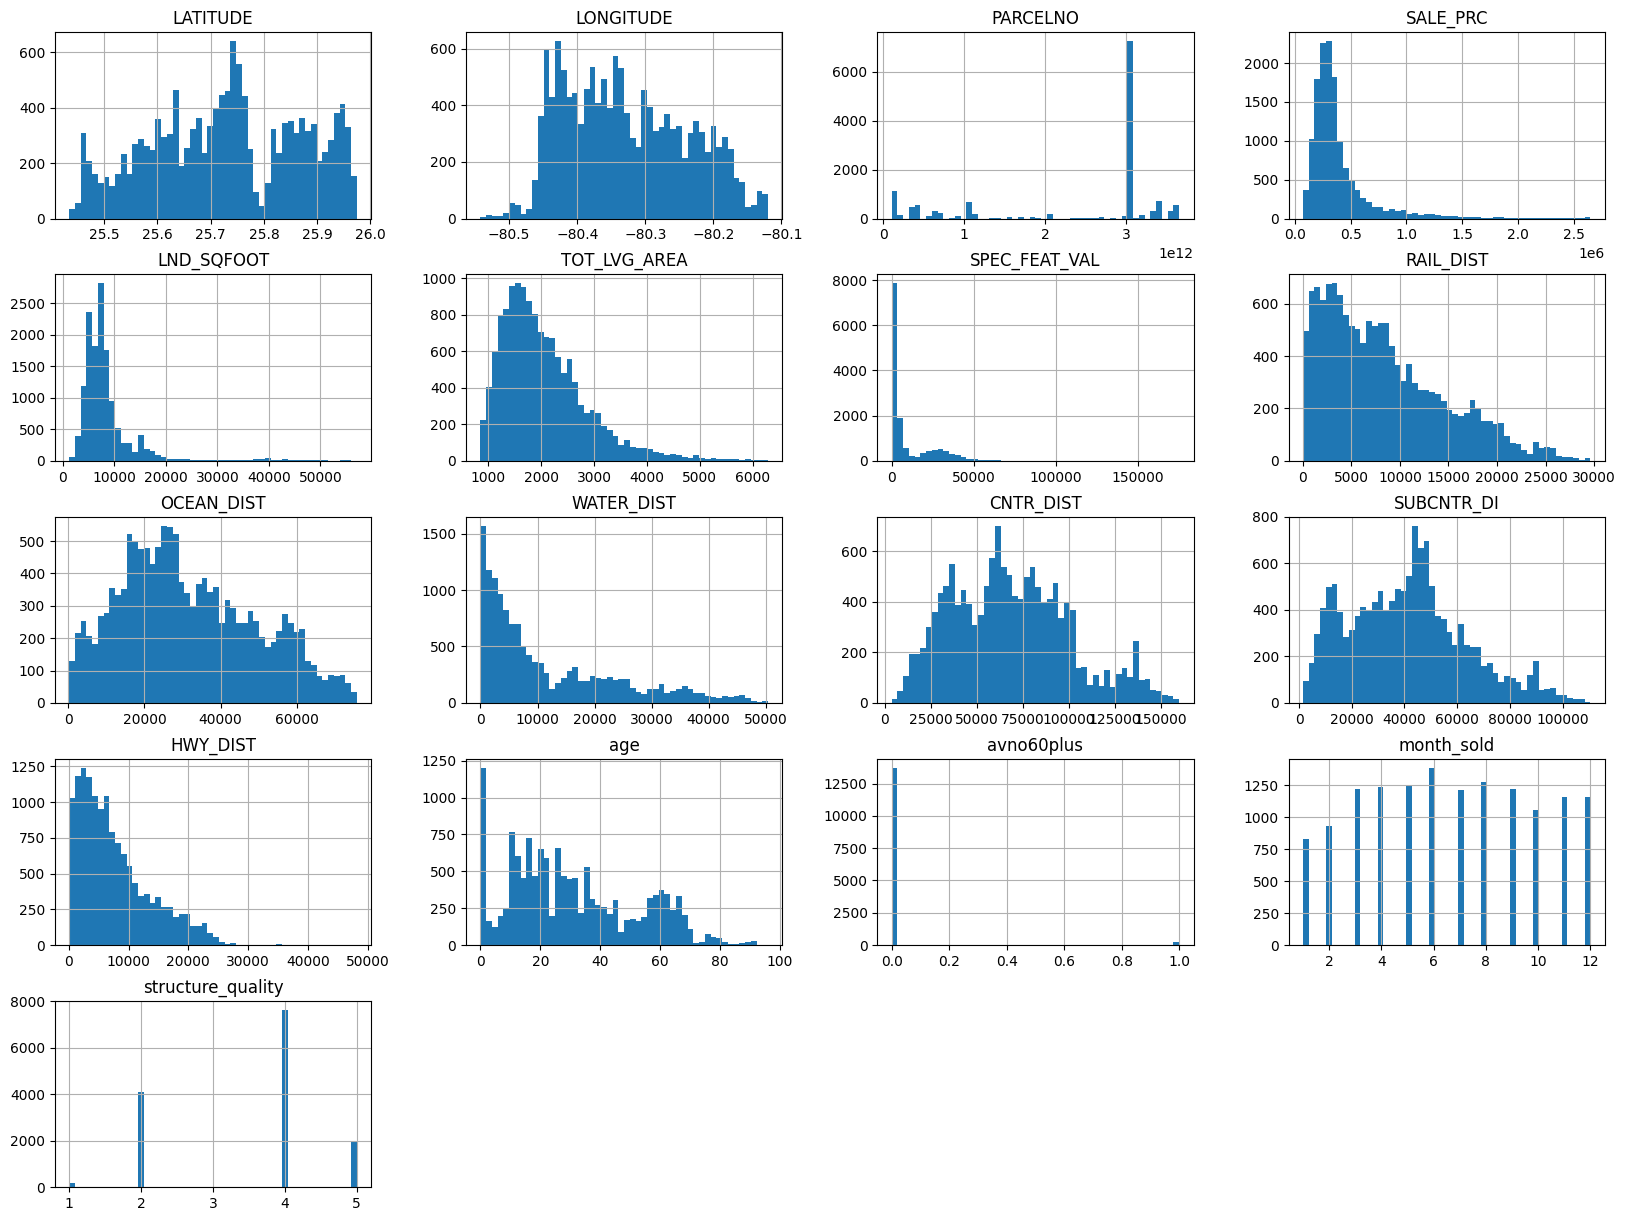

In [107]:
Miami_house_prices.hist(bins=50, figsize=(20,15))
plt.show()



Ques10. df.**hist**(bins =20, figsize=(20,20), color = 'b')

Ques11. **option C ; Scatterplot**

Ques12. **option D & A **

In [112]:
# Selecting the relevant columns for regression analysis
X = Miami_house_prices[['TOT_LVG_AREA']]
y = Miami_house_prices['SALE_PRC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
regr.coef_, regr.intercept_, mse, r2
#print
print(f"Slope: {regr.coef_[0]}")
print(f"Intercept: {regr.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Slope: 261.5403472302063
Intercept: -137576.16899275163
Mean Squared Error: 54790410910.594795
R-squared: 0.4435825352108883


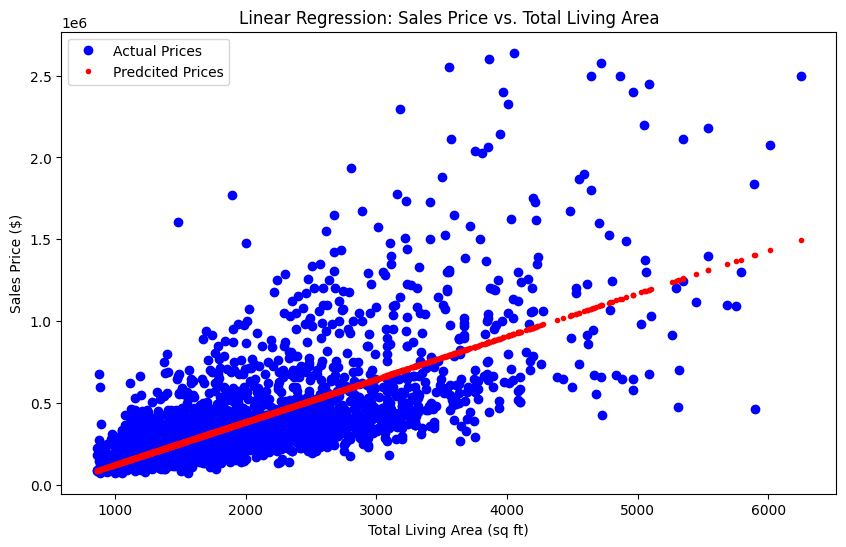

[261.54034723]
-137576.16899275163


In [114]:

# Plotting the actual prices as a scatter plot and the predicted regression line
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test,'o',color='blue', label='Actual Prices')
plt.plot(X_test, y_pred,'.', color='red', label = 'Predcited Prices')
#plt.scatter(y_test, y_pred, color='blue',label='Actual vs Predicted')

# Adding labels and title
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Sales Price ($)')
plt.title('Linear Regression: Sales Price vs. Total Living Area')
plt.legend()
plt.show()
#slope and intercept
print(regr.coef_)
print(regr.intercept_)


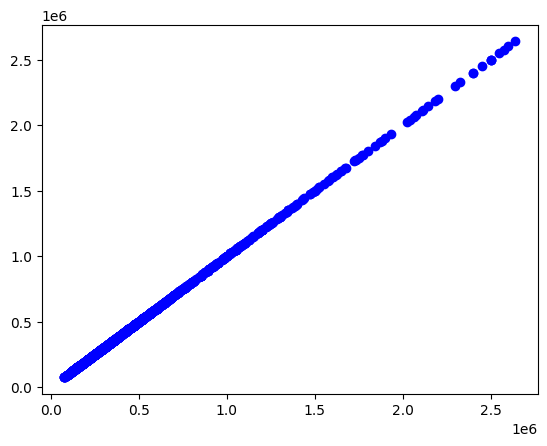

In [110]:

# Create the scatter plot
plt.scatter(y_test, y_pred, color='blue',label='Actual vs Predicted')
plt.show()

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = regr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In regression tasks, metrics like accuracy, precision, and recall aren't applicable because they are designed for classification problems, where the outputs are discrete classes

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regr.predict(X_test)

# Calculate regression metrics instead of classification metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 54790410910.594795
R-squared: 0.4435825352108883


In [120]:
data = pd.DataFrame({'TOT_LVG_AREA': 1753}, index = [0])

In [121]:
regr.predict(data)

array([320904.0597018])

Slope: -1117039.5779245852
Intercept: 192377593.171102


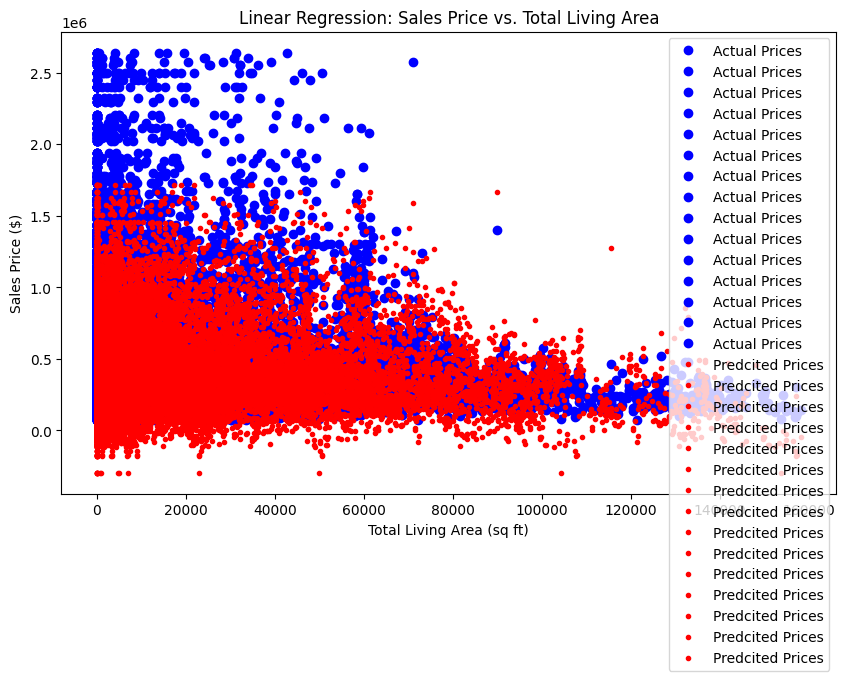

In [128]:

X_1 = Miami_house_prices.drop(['SALE_PRC', 'PARCELNO'], axis=1)
y_1 = Miami_house_prices['SALE_PRC']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
regr_1 = linear_model.LinearRegression()
regr_1.fit(X_train_1, y_train_1)
y_pred_1 = regr_1.predict(X_test_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)
regr_1.coef_, regr_1.intercept_, mse_1, r2_1

print(f"Slope: {regr_1.coef_[0]}")
print(f"Intercept: {regr_1.intercept_}")

#plot
plt.figure(figsize=(10, 6))
plt.plot(X_test_1, y_test_1,'o',color='blue', label='Actual Prices')
plt.plot(X_test_1, y_pred_1,'.', color='red', label = 'Predcited Prices')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Sales Price ($)')
plt.title('Linear Regression: Sales Price vs. Total Living Area')
plt.legend()
plt.show()




In [129]:
mse = mean_squared_error(y_test_1, y_pred_1)
r2 = r2_score(y_test_1, y_pred_1)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 30556883545.58729
R-squared: 0.6896832239123788


In [132]:
feature_data = pd.DataFrame({
        'LATITUDE': [25.77],'LONGITUDE': [-80.19],
        'LND_SQFOOT': [10000],
        'TOT_LVG_AREA': [2000],
        'SPEC_FEAT_VAL': [10000],
        'RAIL_DIST': [1000],
        'OCEAN_DIST': [1000],
        'WATER_DIST': [1000],
        'CNTR_DIST': [1000],
        'SUBCNTR_DI': [1000],
        'HWY_DIST': [1000],
        'age': [20],
        'avno60plus': [1],
        'month_sold': [1],
        'structure_quality': [1]
    })
feature_data


,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.77,-80.19,10000,2000,10000,1000,1000,1000,1000,1000,1000,20,1,1,1


In [133]:
new_prediction = regr_1.predict(feature_data)
new_prediction

array([460314.73818043])